In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# matrix product

In [2]:
def dot(df1_, df2_):
    m = df1_.shape[0]
    n = df1_.shape[1]
    p = df2_.shape[1]
    buf_list = np.zeros((m, p))
    for i in np.arange(m):
        for j in np.arange(p):
            buf_list[i][j] = sum(df1_.T[i] * df2_[j])
    return( pd.DataFrame(buf_list) )

# LU decomposition

In [3]:
def list_find_L(list_):
    L = np.identity( len(list_[0]) )
    for i in list_:
        buf = -i
        np.fill_diagonal(buf.values, 1)
        L = dot(L, buf)
    return(L)

In [4]:
def LU_dec(df_):
    R_list = []
    for now_col in np.arange(len(df_)-1):
        divisor = df_[now_col][now_col]
        buf = df_[now_col][now_col+1:] / divisor * -1
        R = pd.DataFrame( np.identity(len(df_)))
        R.loc[now_col+1:][now_col] = buf
        R_list = R_list + [R]
        df_ = dot(R, df_)
    
    L = pd.DataFrame(list_find_L(R_list))
    return( (L, df_) )

# Linear system slover using LU decompotision

In [5]:
def Ly_equal_b(L_, b_):
    L_ = L_.to_numpy()
    y = np.zeros( len( L_ ) )   
    y[0] = b_[0]
    for i in np.arange(1, len(b_)):
        y[i] = b_[i] - sum( L_[i] * y )
    return(y)   

In [6]:
def Ux_equal_y(U_, y_):
    U_ = U_.to_numpy()
    x = np.zeros( len( U_ ) ) 
    i = len( U_ )-1
    x[i] = y_[i] / U_[i][i]
    for i in np.flip(np.arange(len( U_ )-1)):
        x[i] = ( y_[i] - sum( U_[i] * x ) ) /  U_[i][i]
    return(x)

In [7]:
def LU_equal_b(L_, U_, b_):
    y_ = Ly_equal_b(L_, b_)
    x = Ux_equal_y(U_, y_)
    return(x)

# Find matrix inverse

In [8]:
def inv(df_):
    buf = LU_dec(df_)
    L = buf[0]
    U = buf[1]
    list_ = np.identity(len(df_))
    buf = []
    for i in list_:
        buf = buf + [LU_equal_b(L, U, i)]

    buf = pd.DataFrame(buf)
    return(buf.T)

# given data make A matrix

In [9]:
def make_A(list_, base_):
    buf_df = pd.DataFrame()
    j = 0
    for i in np.arange(base_):
        #col_name = "x_%d" % i
        buf_df[j] = [ele ** i for ele in list_]
        j = j+1
    
    return(buf_df)

# given lambda make lambda * I

In [10]:
def make_I(int_):
    buf = np.identity(int_)
    buf = buf * lamda
    return( pd.DataFrame(buf) ) 

# Find LSE coefficient

In [11]:
def find_coe():
    A = make_A(read_file.x)
    print(A)
    y = pd.DataFrame(read_file.y)
    y.columns = [0]
    buf = dot(A.T, A) + make_I( base_par )
    buf2 = dot(inv(buf), buf)
    buf3 = dot(buf2, A.T)
    return(dot(buf3, y))

In [12]:
def reg_slover(pd_, base_, lambda_):
    A = make_A(pd_.x, base_)
    b = pd.DataFrame(pd_.y)
    b.columns = [0]
    buf = dot(A.T, A)
    lamda_mat = pd.DataFrame(np.identity( len(buf))) * lambda_
    buf2 = dot(inv(buf + lamda_mat), A.T.dot(b))
    return( (buf2, A, b))

# calculate SSE

In [13]:
def error_sum(reg_sol_):
    test = reg_sol_
    buf = (dot(test[1], test[0]) - test[2])**2
    return( buf.sum()[0])

# format that given by request

In [14]:
def output_format(reg_sol_):
    test = reg_sol_
    buf_list = []
    for power, coef in  enumerate(test[0][0]):
        buf2 = ""
        if( np.sign(coef) == 1):
            buf2 = "+%.2fX^%.d"%( coef, power)
        else:
            buf2 = "%.2fX^%.d"%( coef, power)
        buf_list = buf_list + [buf2]
    buf_list.reverse()
    buf = ''.join(buf_list)[:-3]
    if( buf[0] == "+"):
        buf = buf[1:]
    buf = buf.replace("+", " + ").replace("-", " - ")
    return(buf)

# plot the regression line and dot

In [15]:
def predict(np_, reg_sol, base_):
    test = (reg_sol[0], make_A(np_, base_))
    return( dot(test[1], test[0]) )

In [16]:
def plot_function(pd_, reg_slo_, base_):
    line_x = np.linspace(pd_.x.min()-1, pd_.x.max()+1, 100)
    line_y = predict(line_x, reg_slo_, base_)
    plt.plot(line_x, line_y)
    x = pd_.x
    y = pd_.y
    plt.scatter(x, y)

# LSE final

In [130]:
def LSE_function(pd_, lambda_, base_):
    #pd_ = pd.DataFrame({"x":[-2, -1, 0, 1],   "y":[-3, -2, 1, 7]})
    #lambda_ = 1
    #base = 3
    test = reg_slover(pd_, base_, lambda_)
    print("LSE:\nFirring line: %s\nTotal error: %.6f"
          % (output_format(test), error_sum(test)))
    plot_function(pd_, test, base_)

# newton's method final

In [125]:
def newton_method(pd_, base_):
    A = make_A(pd_.x, base_)
    b = pd.DataFrame(pd_.y)
    b.columns = [0]
    X = pd.DataFrame(np.ones(base_))
    H = 2*dot(A.T, A)
    tri = 2*dot(dot(A.T, A), X) - 2*dot(A.T, b)
    test = (X - 1*dot(inv(H), tri), A, b)
    print("Newton's method:\nFirring line: %s\nTotal error: %.6f"% 
          (output_format(test), error_sum(test)))
    plot_function(pd_, test, base_)

# Demo Part

LSE:
Firring line: 1.25X^2 + 4.55X^1 + 1.15
Total error: 0.050000


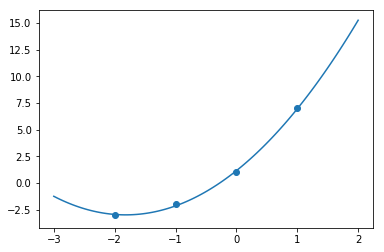

In [133]:
# read data
pd_ = pd.DataFrame({"x":[-2, -1, 0, 1],   "y":[-3, -2, 1, 7]})
lambda_ = 0
base = 3
LSE_function(pd_, lambda_, base)

Newton's method:
Firring line: 1.25X^2 + 4.55X^1 + 1.15
Total error: 0.050000


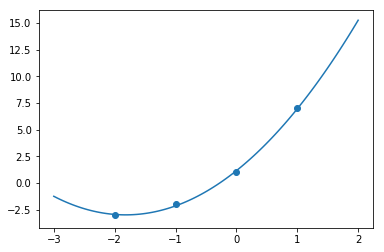

In [134]:
newton_method(pd_, base)